# Importing all libraries

In [316]:
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data Loading And Data Preprocessing

In [400]:
df = pd.read_csv("/content/dataset_anxiety.csv", encoding='latin1')
df.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3,Hours_streams
0,0,0,0,0,0,1,0,1,3,5,...,96,2,76,0,0.047619,0.400000,0.191176,97,111,4.0
1,2,1,2,2,2,1,0,2,3,3,...,28,2,73,0,0.476190,0.266667,0.382353,30,36,25.0
2,0,0,0,1,0,1,0,1,2,4,...,15,2,80,0,0.095238,0.266667,0.485294,15,16,35.0
3,3,1,2,1,0,1,0,2,5,6,...,3,2,130,0,0.380952,0.766667,0.441176,3,4,14.0
4,0,0,0,0,0,0,1,1,5,2,...,11,2,142,0,0.047619,0.466667,0.117647,9,11,21.0





# Splitting data into training and testing

In [384]:
X = df.drop(['GADE'], axis=1).reset_index(drop=True)
Y = df['GADE'].reset_index(drop=True)

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.13, random_state=0)

In [386]:
print(len(set(y_test)))

3


# Training LogisticRegression DecisionTreeClassifier RandomForestClassifier MultinomialNB


Training Random Forest...

Confusion Matrix for Random Forest:
[[1000  167   11]
 [ 158  918   30]
 [   0   21  571]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      1178
         1.0       0.83      0.83      0.83      1106
         2.0       0.93      0.96      0.95       592

    accuracy                           0.87      2876
   macro avg       0.88      0.88      0.88      2876
weighted avg       0.86      0.87      0.87      2876

Train ROC AUC (macro): 1.00
Test ROC AUC (macro): 0.97


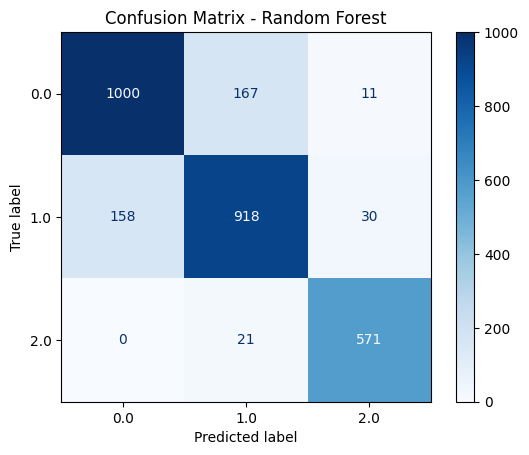

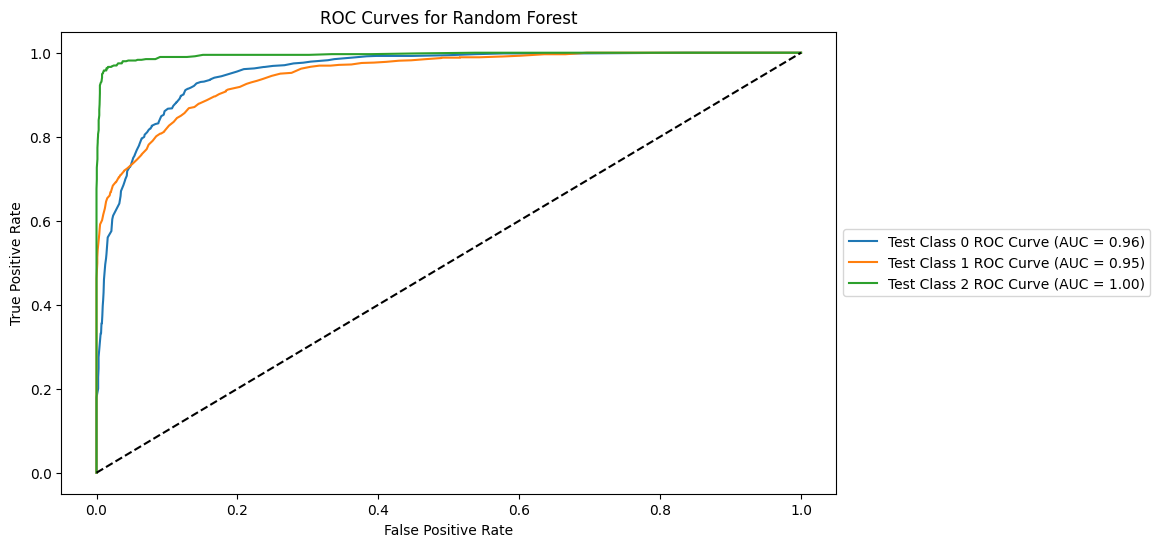

Random Forest model saved as random_forest_model.joblib

Training Logistic Regression...

Confusion Matrix for Logistic Regression:
[[907 251  20]
 [372 594 140]
 [ 42 216 334]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.69      0.77      0.73      1178
         1.0       0.56      0.54      0.55      1106
         2.0       0.68      0.56      0.62       592

    accuracy                           0.64      2876
   macro avg       0.64      0.62      0.63      2876
weighted avg       0.64      0.64      0.63      2876

Train ROC AUC (macro): 0.81
Test ROC AUC (macro): 0.81


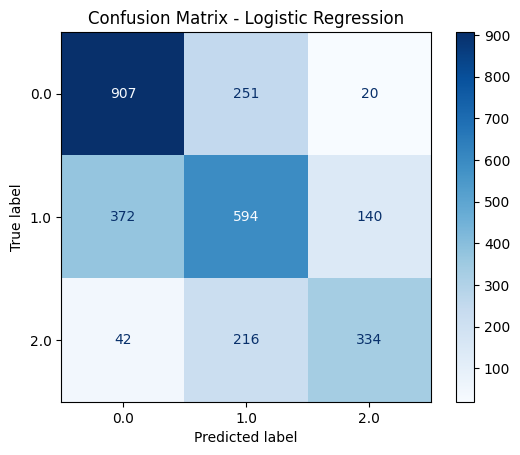

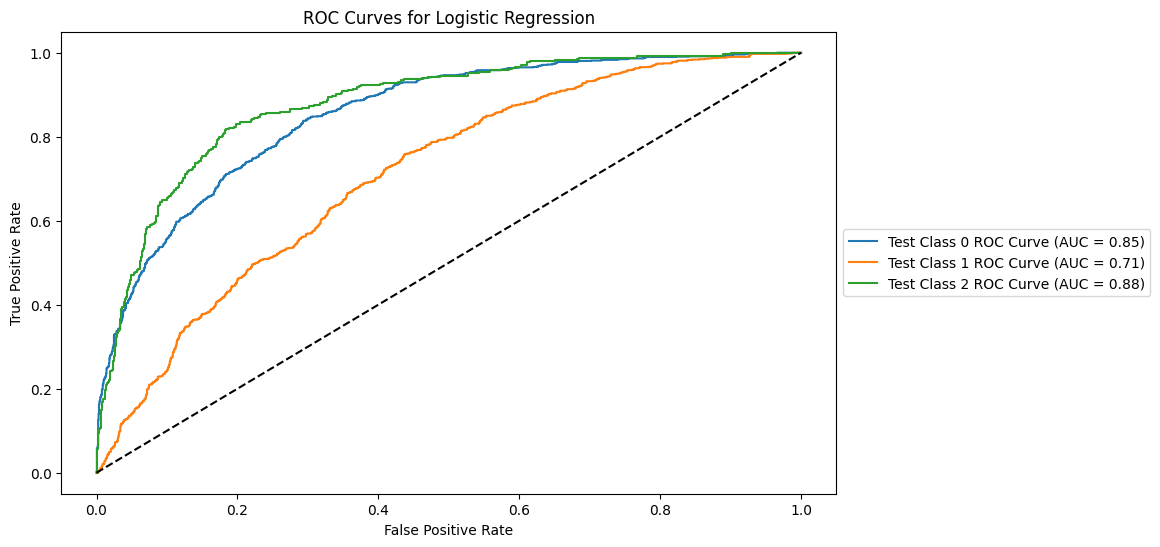

Logistic Regression model saved as logistic_regression_model.joblib

Training Decision Tree...

Confusion Matrix for Decision Tree:
[[938 205  35]
 [189 851  66]
 [  6  16 570]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81      1178
         1.0       0.79      0.77      0.78      1106
         2.0       0.85      0.96      0.90       592

    accuracy                           0.82      2876
   macro avg       0.82      0.84      0.83      2876
weighted avg       0.82      0.82      0.82      2876

Train ROC AUC (macro): 1.00
Test ROC AUC (macro): 0.87


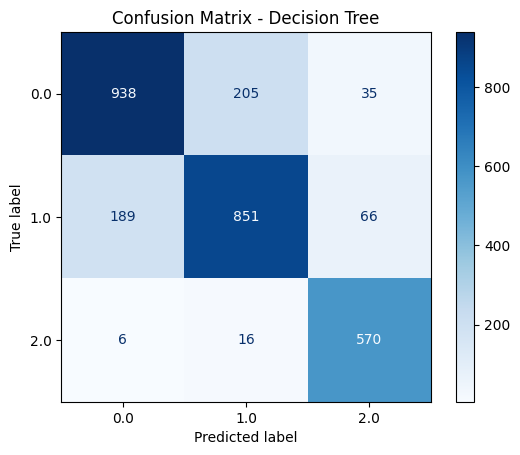

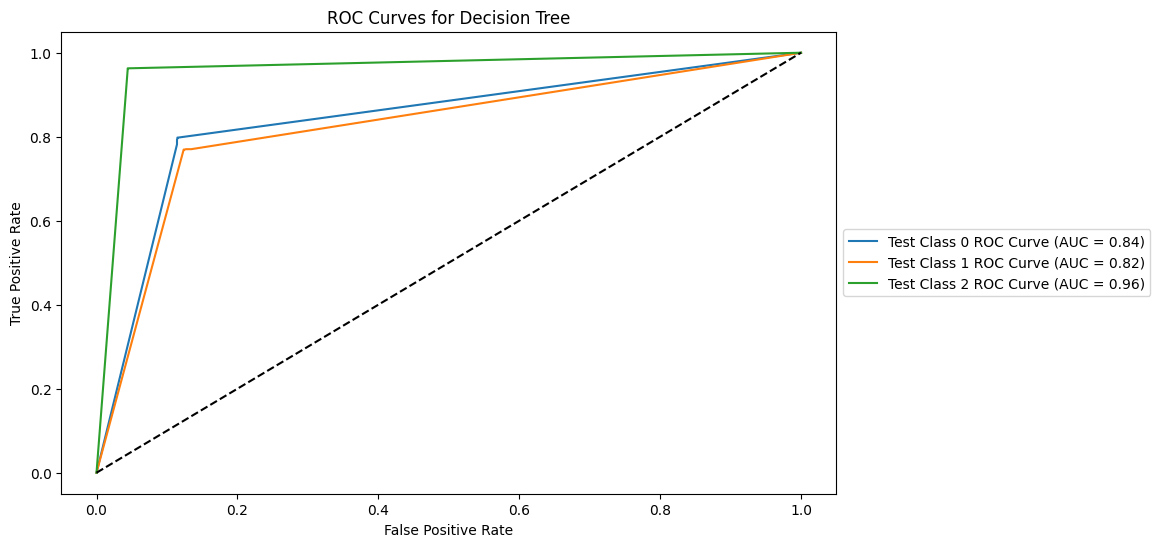

Decision Tree model saved as decision_tree_model.joblib

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 11501, number of used features: 26
[LightGBM] [Info] Start training from score -0.912256
[LightGBM] [Info] Start training from score -0.928406
[LightGBM] [Info] Start training from score -1.593566

Confusion Matrix for LightGBM:
[[929 234  15]
 [278 757  71]
 [ 19  84 489]]

Classification Report for LightGBM:
              precision    recall  f1-score   support

         0.0       0.76      0.79      0.77      1178
         1.0       0.70      0.68      0.69      1106
         2.0       0.85      0.83      0.84       592

    accuracy                           0.76      2876
   macro avg       0.

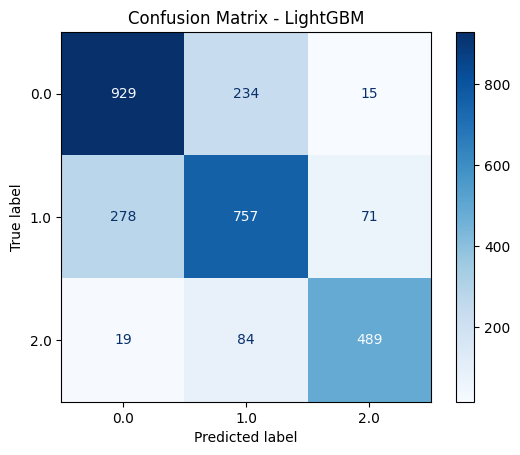

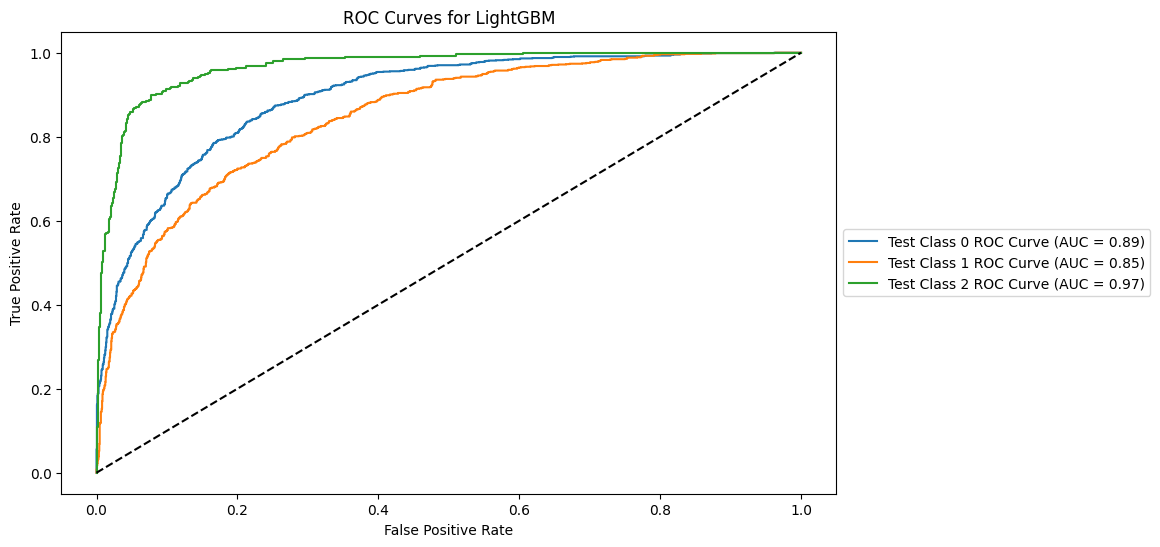

LightGBM model saved as lightgbm_model.joblib


In [392]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
import lightgbm as lgb
import numpy as np



# Define models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
lgb_model = lgb.LGBMClassifier(random_state=42)

# Create pipelines for each model
rf_pipeline = Pipeline([
    ('model', rf_model)
])

lr_pipeline = Pipeline([
    ('model', lr_model)
])

dt_pipeline = Pipeline([
    ('model', dt_model)
])

lgb_pipeline = Pipeline([
    ('model', lgb_model)
])

# List of pipelines for ease of iteration
pipelines = [rf_pipeline, lr_pipeline, dt_pipeline, lgb_pipeline]

# Iterate over pipelines
for pipeline, model_name in zip(pipelines, ['Random Forest', 'Logistic Regression', 'Decision Tree', 'LightGBM']):
    print(f"\nTraining {model_name}...")

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    predictions = pipeline.predict(X_test)

    # Evaluate the model
    print(f"\nConfusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, predictions))

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, predictions))

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predictions), display_labels=np.unique(y_test))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    disp.ax_.set_title(f'Confusion Matrix - {model_name}')

    # Compute ROC AUC scores
    roc_auc_train = roc_auc_score(y_train, pipeline.predict_proba(X_train), multi_class='ovr', average='macro')
    roc_auc_test = roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='macro')

    # Print ROC AUC scores
    print(f'Train ROC AUC (macro): {roc_auc_train:.2f}')
    print(f'Test ROC AUC (macro): {roc_auc_test:.2f}')

    # Compute ROC curves
    n_classes = len(np.unique(y_test))
    fpr = dict()
    tpr = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), pipeline.predict_proba(X_test)[:, i])

    # Plot ROC curves
    plt.figure(figsize=(10, 6))
    for i in range(n_classes):
        auc_test = roc_auc_score((y_test == i).astype(int), pipeline.predict_proba(X_test)[:, i])
        plt.plot(fpr[i], tpr[i], label=f'Test Class {i} ROC Curve (AUC = {auc_test:.2f})')

    # Plot the random classifier
    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {model_name}')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    # Save the model
    joblib.dump(pipeline, f'{model_name.lower().replace(" ", "_")}_model.joblib')
    print(f"{model_name} model saved as {model_name.lower().replace(' ', '_')}_model.joblib")

plt.show()  # Show all plots together


#Trainng Bi-LSTM

In [394]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming X_train and X_test are DataFrames, and y_train, y_test are labels
# Convert DataFrames to NumPy arrays
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Encode labels if they are not one-hot encoded
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train_encoded))
y_train_one_hot = keras.utils.to_categorical(y_train_encoded, num_classes)
y_test_one_hot = keras.utils.to_categorical(y_test_encoded, num_classes)

# Adjust the values based on your actual data dimensions
time_steps = 1  # Set the number of time steps
features = X_train_array.shape[1]  # Adjust based on the number of features in your data

# Reshape input data for LSTM
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], time_steps, features))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], time_steps, features))

# Define your BiLSTM model
model = Sequential()

# Add a Bidirectional LSTM layer with 50 units, input_shape=(time_steps, features)
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(time_steps, features)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Another Bidirectional LSTM layer with 50 units
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Another Bidirectional LSTM layer with 50 units (you can customize the number of units)
model.add(Bidirectional(LSTM(50)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Add a Dense layer with the appropriate number of output neurons and softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Use learning_rate instead of lr
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with your reshaped data
model.fit(X_train_reshaped, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test_one_hot))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_one_hot)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10
360/360 [==============================] - 18s 21ms/step - loss: 0.9749 - accuracy: 0.5674 - val_loss: 0.7912 - val_accuracy: 0.6356
Epoch 2/10
360/360 [==============================] - 5s 14ms/step - loss: 0.8204 - accuracy: 0.6127 - val_loss: 0.7383 - val_accuracy: 0.6579
Epoch 3/10
360/360 [==============================] - 6s 16ms/step - loss: 0.7776 - accuracy: 0.6336 - val_loss: 0.7320 - val_accuracy: 0.6488
Epoch 4/10
360/360 [==============================] - 5s 15ms/step - loss: 0.7581 - accuracy: 0.6461 - val_loss: 0.7188 - val_accuracy: 0.6579
Epoch 5/10
360/360 [==============================] - 5s 14ms/step - loss: 0.7450 - accuracy: 0.6548 - val_loss: 0.7123 - val_accuracy: 0.6589
Epoch 6/10
360/360 [==============================] - 10s 28ms/step - loss: 0.7293 - accuracy: 0.6651 - val_loss: 0.7069 - val_accuracy: 0.6697
Epoch 7/10
360/360 [==============================] - 8s 23ms/step - loss: 0.7202 - accuracy: 0.6693 - val_loss: 0.6920 - val_accuracy: 0.67

90/90 [==============================] - 3s 4ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74      1178
         1.0       0.64      0.59      0.61      1106
         2.0       0.71      0.76      0.74       592

    accuracy                           0.69      2876
   macro avg       0.69      0.70      0.70      2876
weighted avg       0.69      0.69      0.69      2876



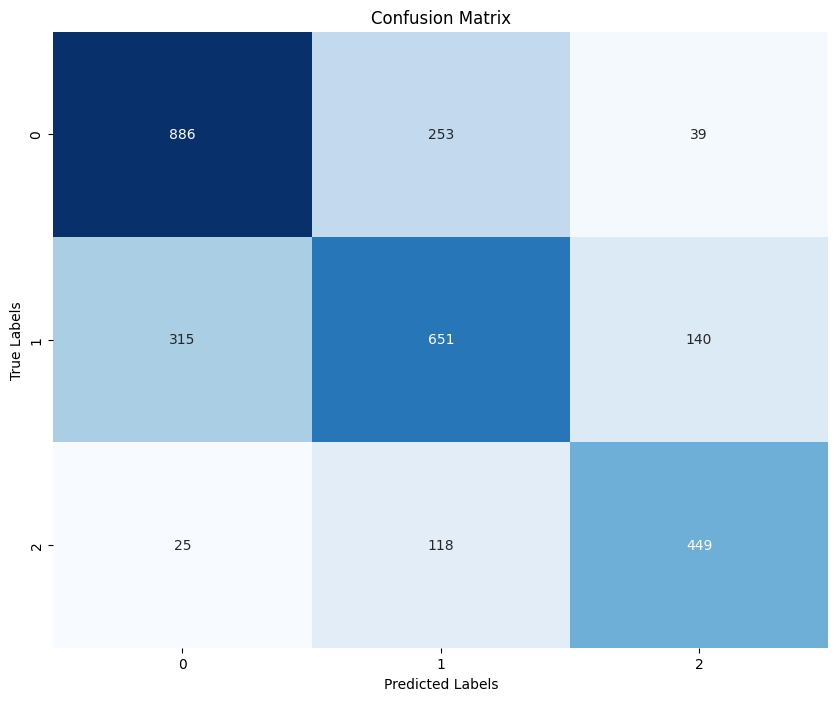

In [395]:
# Predict probabilities for each class for test data
y_pred_prob = model.predict(X_test_reshaped)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_original = label_encoder.inverse_transform(np.argmax(y_test_one_hot, axis=1))
y_pred_original = label_encoder.inverse_transform(y_pred)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test_original, y_pred_original))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_original)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [397]:
class_weight = {0: 1.,
                1: 1.,
                2: 1.}

# Training DNN

In [398]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Assuming X_train and X_test are your feature data, y_train, y_test are labels
# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(np.unique(y_train_encoded))
y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes)

# Define your Dense model
model = Sequential()

# Add a Dense layer with 128 units and activation 'relu'
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())

# Add another Dense layer with 64 units and activation 'relu'
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

# Add the output layer with an appropriate number of units and activation 'softmax'
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with weighted loss
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=10, validation_data=(X_test, y_test_one_hot))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10
1151/1151 [==============================] - 9s 5ms/step - loss: 0.8584 - accuracy: 0.5930 - val_loss: 0.8038 - val_accuracy: 0.6307
Epoch 2/10
1151/1151 [==============================] - 7s 6ms/step - loss: 0.8100 - accuracy: 0.6188 - val_loss: 0.7922 - val_accuracy: 0.6147
Epoch 3/10
1151/1151 [==============================] - 6s 5ms/step - loss: 0.7873 - accuracy: 0.6271 - val_loss: 0.7565 - val_accuracy: 0.6471
Epoch 4/10
1151/1151 [==============================] - 7s 6ms/step - loss: 0.7788 - accuracy: 0.6353 - val_loss: 0.7702 - val_accuracy: 0.6380
Epoch 5/10
1151/1151 [==============================] - 6s 5ms/step - loss: 0.7640 - accuracy: 0.6388 - val_loss: 0.7475 - val_accuracy: 0.6499
Epoch 6/10
1151/1151 [==============================] - 6s 5ms/step - loss: 0.7637 - accuracy: 0.6429 - val_loss: 0.7678 - val_accuracy: 0.6415
Epoch 7/10
1151/1151 [==============================] - 6s 5ms/step - loss: 0.7564 - accuracy: 0.6425 - val_loss: 0.7900 - val_accuracy: